In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import time
import gmaps
from scipy.stats import linregress



In [3]:
# Census data files
census_state_path_2015 = "Output/2015_cleaned_state.csv"


In [4]:
# Read the Census data
census_2015 = pd.read_csv(census_state_path_2015)



In [5]:
census_2015.head()

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,OtherTrans,WorkatHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Poverty,ChildPoverty,Unemployment
0,Alabama,4830620,2341093,2489527,193159,3204658,1270556,22007,59324,1089,...,20994,56260,25,1583312,329430,105863,3715,910480,1318475,454437
1,Alaska,733375,384160,349215,47860,457438,23611,98381,42323,8638,...,19750,16083,10,240061,88175,22190,634,74612,99617,61930
2,Arizona,6641928,3299088,3342840,2015055,3751927,263011,265835,193799,11587,...,77252,156279,21,2230882,412325,166404,5502,1210351,1724490,603924
3,Arkansas,2958208,1451913,1506295,203216,2177095,456609,16531,39968,6628,...,15580,40259,22,969630,205337,78614,2406,571519,821223,231142
4,California,38421464,19087135,19334329,14746502,14878698,2157932,144676,5192680,133245,...,437377,917120,24,13403787,2381720,1434085,34099,6260461,8451647,3845611


In [6]:
census_2015 = census_2015.dropna()

In [7]:
top_2015_income = census_2015.sort_values("Income", ascending=False)
top_2015_income.head(5)

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,OtherTrans,WorkatHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Poverty,ChildPoverty,Unemployment
30,New Jersey,8904413,4343027,4561386,1688178,5093771,1131762,8441,800991,252,...,79834,172193,29,3480774,593056,202379,5794,964839,1377386,786136
6,Connecticut,3593222,1751607,1841615,527252,2487569,347023,4140,149292,0,...,20728,78074,25,1429343,235296,112637,2991,377780,513921,316990
8,District of Columbia,647484,306674,340810,66043,230504,310792,1294,23309,0,...,17566,16890,29,236470,85805,14863,337,116547,172878,62158
20,Maryland,5930538,2872643,3057895,533564,3144704,1723679,11226,354324,1109,...,37101,125789,29,2167820,663202,141861,3696,594311,808746,443822
21,Massachusetts,6705586,3249650,3455936,707169,4981389,434230,8670,399785,552,...,59452,155745,24,2780637,424503,206933,4306,778481,1031917,510891


In [8]:
population1 = census_2015[census_2015["State"] == "New Jersey"]
population1

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,OtherTrans,WorkatHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Poverty,ChildPoverty,Unemployment
30,New Jersey,8904413,4343027,4561386,1688178,5093771,1131762,8441,800991,252,...,79834,172193,29,3480774,593056,202379,5794,964839,1377386,786136


TypeError: unhashable type: 'numpy.ndarray'

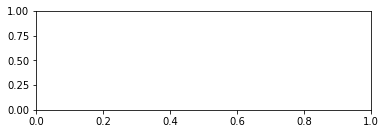

In [9]:
# def gendata(loc1=0, loc2=0):
population1 = census_2015[census_2015["State"] == "New Jersey"]
population2 = census_2015[census_2015["State"] == "Connecticut"]

# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(population1)), population1, label="population1")
plt.scatter(range(len(population2)), population2, label="population2")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

return population1, population2

In [ ]:
# Generate some data and show the scatter plot
population1, population2 = gendata()

In [ ]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(population1, population2, equal_var=False)

In [ ]:
# Generate data with a bigger difference in means
population1, population2 = gendata(loc1=0, loc2=1)

In [ ]:
stats.ttest_ind(population1, population2, equal_var=False)

In [ ]:
#Data Collection for Census data summary
total_pop = census_2015["TotalPop"].sum()
men = census_2015["Men"].sum()/total_pop * 100
women= census_2015["Women"].sum()/total_pop * 100
employed_num = census_2015["Employed"].sum()
employed = census_2015["Employed"].sum()/total_pop * 100
income_avg = census_2015["Income"].mean()
professional = census_2015["Professional"].sum()/employed_num * 100
service = census_2015["Service"].sum()/employed_num * 100
office = census_2015["Office"].sum()/employed_num * 100
construction = census_2015["Construction"].sum()/employed_num * 100
production = census_2015["Production"].sum()/employed_num * 100
drive = census_2015["Drive"].sum()/employed_num * 100
carpool = census_2015["Carpool"].sum()/employed_num * 100
transit = census_2015["Transit"].sum()/employed_num * 100
walk = census_2015["Walk"].sum()/employed_num * 100
workathome = census_2015["WorkatHome"].sum()/employed_num * 100
privatework = census_2015["PrivateWork"].sum()/employed_num * 100
publicwork = census_2015["PublicWork"].sum()/employed_num * 100
selfemployed = census_2015["SelfEmployed"].sum()/employed_num * 100
familywork = census_2015["FamilyWork"].sum()/employed_num * 100
poverty = census_2015["Poverty"].sum()/employed_num * 100
childpoverty = census_2015["ChildPoverty"].sum()/total_pop * 100
unemployment = census_2015["Unemployment"].sum()/total_pop * 100

In [ ]:
summary_2015_df = pd.DataFrame({"Total Pop": [total_pop],
                           "Men%": [men],
                           "Women%": [women],
                           "Income_Avg": [income_avg],
                           "Employed%": [employed],
                           "Professional%": [professional],
                           "Service%": [service],
                           "Office%": [office],
                           "Construction%": [construction],
                           "Production%": [production],
                           "Drive%": [drive],
                           "Carpool%": [carpool],
                           "Transit%": [transit],
                           "Walk%": [walk],
                           "WorkatHome%": [workathome],
                           "Privatework%": [privatework],
                           "Publicwork%": [publicwork],
                           "Selfemployed%": [selfemployed],
                           "Familywork%": [familywork],
                           "Poverty%": [poverty],
                           "Childpoverty%": [childpoverty],
                           "Selfemployed%": [selfemployed],
                           "Unemployment%": [unemployment]})           
                          
             
summary_2015_df .style.format({"Total Pop":"{:,}",
                         "Men%":"{:,.2f}%",
                         "Women%":"{:,.2f}%",
                         "Income_Avg":"${:,.2f}",
                         "Employed%":"{:,.2f}%",
                         "Professional%":"{:,.2f}%",
                         "Service%":"{:,.2f}%",
                         "Office%":"{:,.2f}%",
                         "Construction%":"{:,.2f}%",
                         "Production%":"{:,.2f}%",
                         "Drive%":"{:,.2f}%",
                         "Carpool%":"{:,.2f}%",
                         "Transit%":"{:,.2f}%",
                          "Walk%":"{:,.2f}%",
                          "WorkatHome%":"{:,.2f}%",
                          "Privatework%":"{:,.2f}%",
                          "Publicwork%":"{:,.2f}%",
                          "Selfemployed%":"{:,.2f}%",
                          "Familywork%":"{:,.2f}%",
                          "Poverty%":"{:,.2f}%",
                          "Childpoverty%":"{:,.2f}%",
                          "Selfemployed%":"{:,.2f}%",
                          "Unemployment%":"{:,.2f}%"})  

In [ ]:
list(census_2015)